In [1]:
import pandas as pd
import numpy as np
import glob

In [2]:
Immo_Data=pd.read_csv("DELIVERABLE.csv", sep=",")
Immo_Data.head(10)

,classified.type,classified.subtype,classified.price,classified.transactionType,classified.zip,classified.kitchen.type,NOTRclassified.building.constructionYear,classified.building.condition,NOTRclassified.energy.heatingType,NOTRclassified.certificates.primaryEnergyConsumptionLevel,classified.bedroom.count,classified.land.surface,classified.atticExists,classified.outdoor.garden.surface,classified.outdoor.terrace.exists,classified.wellnessEquipment.hasSwimmingPool,classified.parking.parkingSpaceCount.indoor
0,house,house,1325000,for sale,1190,not installed,1922,good,fueloil,534,6,800,0,None,1,0,1
1,house,house,338744,for sale,3520,installed,2022,None,gas,None,3,370,0,355,0,0,1
2,house,house,2950000,for sale,1050,hyper equipped,1984,as new,None,319,2,180,0,None,1,0,None
3,house group,house group,283000 - 304000,for sale,3900,None,None,None,None,None,None,None,0,None,0,0,None
4,house group,house group,220000 - 259000,for sale,6150,None,None,None,None,None,None,None,0,None,0,0,None
5,house group,house group,316937 - 416492,for sale,2100,None,None,None,None,None,None,None,0,None,0,0,None
6,house group,house group,321000 - 361000,for sale,8430,None,None,None,None,None,None,None,0,None,0,0,None
7,house,house,338215,for sale,3520,installed,2022,None,gas,None,3,406,0,406,0,0,1
8,house,house,301322,for sale,3840,installed,2022,None,gas,None,3,420,0,None,0,0,None
9,house,house,310210,for sale,3840,installed,2022,None,gas,None,3,344,0,None,0,0,1


In [3]:
Immo_Data.shape

(8291, 17)

In [4]:
Immo_Data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8286     True
8287    False
8288    False
8289    False
8290    False
Length: 8291, dtype: bool

In [5]:
# Drop duplicates
Immo_Data.drop_duplicates(inplace=True) 

In [6]:
print("There are {} rows of data".format(len(Immo_Data)))

There are 5751 rows of data


In [7]:
# Checking how many rows of each attribute are NaN
Immo_Data.isnull()

,classified.type,classified.subtype,classified.price,classified.transactionType,classified.zip,classified.kitchen.type,NOTRclassified.building.constructionYear,classified.building.condition,NOTRclassified.energy.heatingType,NOTRclassified.certificates.primaryEnergyConsumptionLevel,classified.bedroom.count,classified.land.surface,classified.atticExists,classified.outdoor.garden.surface,classified.outdoor.terrace.exists,classified.wellnessEquipment.hasSwimmingPool,classified.parking.parkingSpaceCount.indoor
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8287,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8288,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8289,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#Count all NaN in a DataFrame (both columns & Rows)
Immo_Data.isnull().sum().sum()

0

In [9]:
#Count total NaN at each column in DataFrame
Immo_Data.isnull().sum()

classified.type                                              0
classified.subtype                                           0
classified.price                                             0
classified.transactionType                                   0
classified.zip                                               0
classified.kitchen.type                                      0
NOTRclassified.building.constructionYear                     0
classified.building.condition                                0
NOTRclassified.energy.heatingType                            0
NOTRclassified.certificates.primaryEnergyConsumptionLevel    0
classified.bedroom.count                                     0
classified.land.surface                                      0
classified.atticExists                                       0
classified.outdoor.garden.surface                            0
classified.outdoor.terrace.exists                            0
classified.wellnessEquipment.hasSwimmingPool           

In [10]:
#Print dtype of every attribute
Immo_Data.dtypes

classified.type                                              object
classified.subtype                                           object
classified.price                                             object
classified.transactionType                                   object
classified.zip                                               object
classified.kitchen.type                                      object
NOTRclassified.building.constructionYear                     object
classified.building.condition                                object
NOTRclassified.energy.heatingType                            object
NOTRclassified.certificates.primaryEnergyConsumptionLevel    object
classified.bedroom.count                                     object
classified.land.surface                                      object
classified.atticExists                                        int64
classified.outdoor.garden.surface                            object
classified.outdoor.terrace.exists               

In [11]:
#Immo_Data['NOTRclassified.building.constructionYear'] = Immo_Data['NOTRclassified.building.constructionYear'].replace("None",np.nan)
print(Immo_Data['NOTRclassified.building.constructionYear'])

0       1922
1       2022
2       1984
3       None
4       None
        ... 
8274    1910
8287    None
8288    None
8289    None
8290    None
Name: NOTRclassified.building.constructionYear, Length: 5751, dtype: object


In [12]:
#Count all NaN in a DataFrame (both columns & Rows)
Immo_Data.isnull().sum().sum()

0

In [13]:
# Change dtype of columns price, surface, bedrooms.count and Construction Year
Immo_Data['classified.price'] = pd.to_numeric(Immo_Data['classified.price'],errors = 'coerce')
Immo_Data['classified.land.surface'] = pd.to_numeric(Immo_Data['classified.land.surface'],errors = 'coerce')
Immo_Data['classified.bedroom.count'] = pd.to_numeric(Immo_Data['classified.bedroom.count'],errors = 'coerce')
Immo_Data['NOTRclassified.building.constructionYear'] = pd.to_numeric(Immo_Data['NOTRclassified.building.constructionYear'],errors = 'coerce')
Immo_Data.dtypes

classified.type                                               object
classified.subtype                                            object
classified.price                                             float64
classified.transactionType                                    object
classified.zip                                                object
classified.kitchen.type                                       object
NOTRclassified.building.constructionYear                     float64
classified.building.condition                                 object
NOTRclassified.energy.heatingType                             object
NOTRclassified.certificates.primaryEnergyConsumptionLevel     object
classified.bedroom.count                                     float64
classified.land.surface                                      float64
classified.atticExists                                         int64
classified.outdoor.garden.surface                             object
classified.outdoor.terrace.exists 

In [14]:
## Print unique values of the "type" and "subtype" attribute
# a = Immo_Data['classified.type'].unique() 
# print(a)
a = Immo_Data['classified.subtype'].unique() 
print(a)

['house' 'house group' 'exceptional property' 'castle' 'villa'
 'country cottage' 'farmhouse' 'bungalow' 'apartment block' 'mansion'
 'mixed use building' 'chalet' 'flat studio' 'apartment' 'town house'
 'manor house' 'other property' 'duplex' 'ground floor' 'apartment group'
 'penthouse']


In [15]:
Immo_Data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
classified.type,5751,4,house,5515,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classified.subtype,5751,21,house,4022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classified.price,5524.0,NaN,NaN,NaN,465925.566256,554980.719512,10000.0,220000.0,319000.0,489250.0,9500000.0
classified.transactionType,5751,1,for sale,5751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classified.zip,5751,821,9000,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classified.kitchen.type,5751,9,None,2072,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOTRclassified.building.constructionYear,2871.0,NaN,NaN,NaN,1964.369209,46.089198,1753.0,1935.0,1969.0,2003.0,2024.0
classified.building.condition,5751,7,good,1545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOTRclassified.energy.heatingType,5751,7,gas,2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOTRclassified.certificates.primaryEnergyConsumptionLevel,5751,953,None,1187,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
Immo_Data=Immo_Data[["classified.subtype","classified.price","classified.land.surface","classified.bedroom.count","classified.atticExists","classified.outdoor.terrace.exists","classified.wellnessEquipment.hasSwimmingPool"]]
Immo_Data.head(10)

,classified.subtype,classified.price,classified.land.surface,classified.bedroom.count,classified.atticExists,classified.outdoor.terrace.exists,classified.wellnessEquipment.hasSwimmingPool
0,house,1325000.0,800.0,6.0,0,1,0
1,house,338744.0,370.0,3.0,0,0,0
2,house,2950000.0,180.0,2.0,0,1,0
3,house group,NaN,NaN,NaN,0,0,0
4,house group,NaN,NaN,NaN,0,0,0
5,house group,NaN,NaN,NaN,0,0,0
6,house group,NaN,NaN,NaN,0,0,0
7,house,338215.0,406.0,3.0,0,0,0
8,house,301322.0,420.0,3.0,0,0,0
9,house,310210.0,344.0,3.0,0,0,0


In [17]:
Immo_Data.shape

(5751, 7)

In [44]:
Immo_Data =Immo_Data.dropna()

In [19]:
Immo_Data.shape

(5499, 7)

In [20]:
Immo_Data.isnull().sum().sum()

0

In [21]:
#Count total NaN at each column in DataFrame
Immo_Data.isnull().sum()

classified.subtype                              0
classified.price                                0
classified.land.surface                         0
classified.bedroom.count                        0
classified.atticExists                          0
classified.outdoor.terrace.exists               0
classified.wellnessEquipment.hasSwimmingPool    0
dtype: int64

In [22]:
Immo_Data.head(10)

,classified.subtype,classified.price,classified.land.surface,classified.bedroom.count,classified.atticExists,classified.outdoor.terrace.exists,classified.wellnessEquipment.hasSwimmingPool
0,house,1325000.0,800.0,6.0,0,1,0
1,house,338744.0,370.0,3.0,0,0,0
2,house,2950000.0,180.0,2.0,0,1,0
7,house,338215.0,406.0,3.0,0,0,0
8,house,301322.0,420.0,3.0,0,0,0
9,house,310210.0,344.0,3.0,0,0,0
10,house,342866.0,993.0,3.0,1,0,0
12,house,316748.0,341.0,3.0,0,0,0
13,house,320548.0,394.0,3.0,0,0,0
14,house,266885.0,341.0,3.0,0,0,0


In [23]:
df_house_group= Immo_Data[Immo_Data['classified.subtype'] == 'house group']
df_house_group.head(10)

,classified.subtype,classified.price,classified.land.surface,classified.bedroom.count,classified.atticExists,classified.outdoor.terrace.exists,classified.wellnessEquipment.hasSwimmingPool


In [24]:
df_house_group.shape

(0, 7)

In [25]:
#Creat New datasets without "house group"

New_Immo_Data= Immo_Data[Immo_Data['classified.subtype'] != 'house group']
New_Immo_Data.head(10)

,classified.subtype,classified.price,classified.land.surface,classified.bedroom.count,classified.atticExists,classified.outdoor.terrace.exists,classified.wellnessEquipment.hasSwimmingPool
0,house,1325000.0,800.0,6.0,0,1,0
1,house,338744.0,370.0,3.0,0,0,0
2,house,2950000.0,180.0,2.0,0,1,0
7,house,338215.0,406.0,3.0,0,0,0
8,house,301322.0,420.0,3.0,0,0,0
9,house,310210.0,344.0,3.0,0,0,0
10,house,342866.0,993.0,3.0,1,0,0
12,house,316748.0,341.0,3.0,0,0,0
13,house,320548.0,394.0,3.0,0,0,0
14,house,266885.0,341.0,3.0,0,0,0


In [26]:
New_Immo_Data.shape

(5499, 7)

In [27]:
New_Immo= New_Immo_Data[["classified.subtype","classified.price","classified.land.surface","classified.bedroom.count","classified.atticExists","classified.outdoor.terrace.exists","classified.wellnessEquipment.hasSwimmingPool"]]
New_Immo.head()

,classified.subtype,classified.price,classified.land.surface,classified.bedroom.count,classified.atticExists,classified.outdoor.terrace.exists,classified.wellnessEquipment.hasSwimmingPool
0,house,1325000.0,800.0,6.0,0,1,0
1,house,338744.0,370.0,3.0,0,0,0
2,house,2950000.0,180.0,2.0,0,1,0
7,house,338215.0,406.0,3.0,0,0,0
8,house,301322.0,420.0,3.0,0,0,0


In [28]:
New_Immo.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
classified.subtype,5499,14,house,4009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classified.price,5499.0,NaN,NaN,NaN,466765.426077,556054.002505,10000.0,220000.0,320000.0,490000.0,9500000.0
classified.land.surface,5499.0,NaN,NaN,NaN,1562.933261,12298.472187,0.0,143.5,339.0,783.5,500000.0
classified.bedroom.count,5499.0,NaN,NaN,NaN,3.688307,2.513324,0.0,3.0,3.0,4.0,94.0
classified.atticExists,5499.0,NaN,NaN,NaN,0.260957,0.439196,0.0,0.0,0.0,1.0,1.0
classified.outdoor.terrace.exists,5499.0,NaN,NaN,NaN,0.546281,0.497899,0.0,0.0,1.0,1.0,1.0
classified.wellnessEquipment.hasSwimmingPool,5499.0,NaN,NaN,NaN,0.030005,0.170618,0.0,0.0,0.0,0.0,1.0


In [29]:
s=New_Immo.head(30)

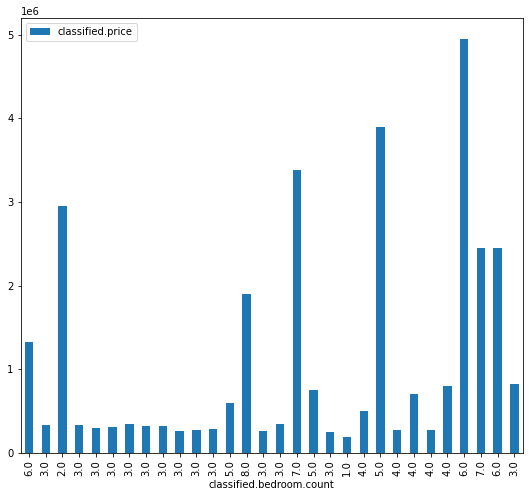

In [30]:
# Create a bar chart of Chemical components for Coil_396378
import matplotlib.pyplot as plt
s.plot(x='classified.bedroom.count', y='classified.price', kind="bar",figsize=(9,8))
plt.show()


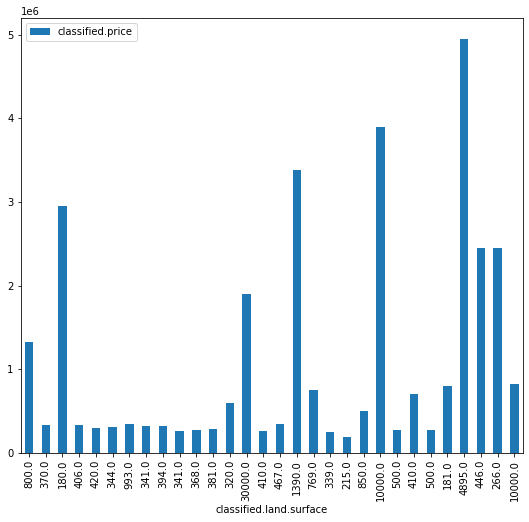

In [31]:
#  Create a bar chart of Land-Sarface Vs Prices
import matplotlib.pyplot as plt
s.plot(x='classified.land.surface', y='classified.price', kind="bar",figsize=(9,8))
plt.show()


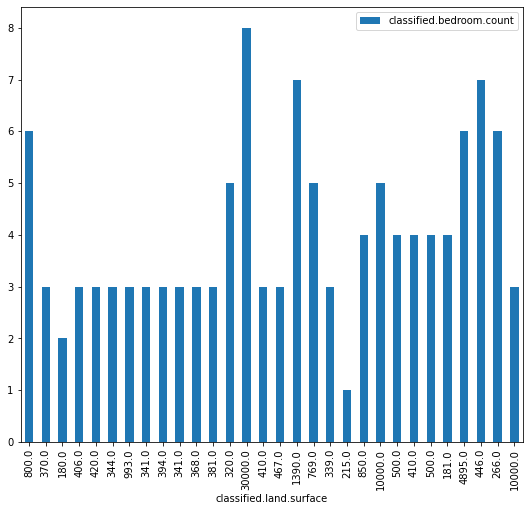

In [32]:
# Create a bar chart of Land-Sarface Vs No of bed-rooms
import matplotlib.pyplot as plt
s.plot(x='classified.land.surface', y='classified.bedroom.count', kind="bar",figsize=(9,8))
plt.show()


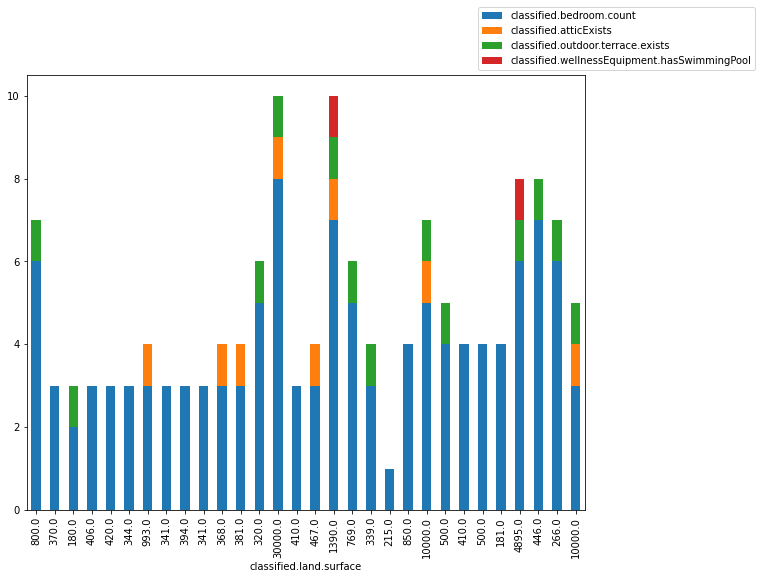

In [33]:
import pandas as pd
import matplotlib.pyplot as plt


s.plot(x='classified.land.surface',y=['classified.bedroom.count', 'classified.atticExists','classified.outdoor.terrace.exists','classified.wellnessEquipment.hasSwimmingPool'], kind="bar",stacked=True,figsize=(10,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.show()

In [34]:
len(New_Immo)

5499

In [45]:
 New_Immo = New_Immo.rename(columns={'classified.subtype':'House_Type', 
                                    'classified.price':'Price',
                                    'classified.land.surface':'Serface', 
                                  'classified.bedroom.count':  'No. of Bed-Room',
                                   'classified.atticExists' :  'AtticExists',
                                  'classified.outdoor.terrace.exists': 'TerraceExists',
                                  'classified.wellnessEquipment.hasSwimmingPool' :  'SwimmingPoolExists'})

In [49]:
 New_Immo.head(10)

,House_Type,Price,Serface,No. of Bed-Room,AtticExists,TerraceExists,SwimmingPoolExists
0,house,1325000.0,800.0,6.0,0,1,0
1,house,338744.0,370.0,3.0,0,0,0
2,house,2950000.0,180.0,2.0,0,1,0
7,house,338215.0,406.0,3.0,0,0,0
8,house,301322.0,420.0,3.0,0,0,0
9,house,310210.0,344.0,3.0,0,0,0
10,house,342866.0,993.0,3.0,1,0,0
12,house,316748.0,341.0,3.0,0,0,0
13,house,320548.0,394.0,3.0,0,0,0
14,house,266885.0,341.0,3.0,0,0,0


In [50]:
 New_Immo.to_csv("New-ImmoElliza.csv")